# Concurrency — Exercise 1 
## Amdahl’s Law and Speed-up

### 1. Problem
Assume 1% of the runtime of a program is not parallelizable. How much speed-up can be achieved by execution on 64 cores, assuming there is no additional overhead for the parallel execution?

In [88]:
'''
    Amdahl's Law:
    S(N) = 1 / ( (1 - P) + (P / N) )

    S ist der Speedup,
    P ist der Anteil des Programms, der parallel ausgeführt werden kann,
    N ist die Anzahl der Prozessoren
'''

P = 0.99
N = 64

S = 1 / ((1 - P) + (P / N))

print("Der maximal mögliche Speedup beträgt: ", S)

Der maximal mögliche Speedup beträgt:  39.26380368098158


### 2. Problem
This time, assume the program above uses a broadcast operation that incurs an overhead that depends on the number of used cores, P. This overhead is 0.0001 * P. 
For which number of cores do you get the highest speedup?

    Kerne   Speed-Up
0       1   0.999901
1       2   1.979810
2       4   3.882003
3       8   7.471105
4      16  13.893906
5      32  24.368550
6      64  39.111772
7     128  56.074635
8     256  71.601502
9     512  83.107601
10   1024  90.368548
11   2048  94.496536


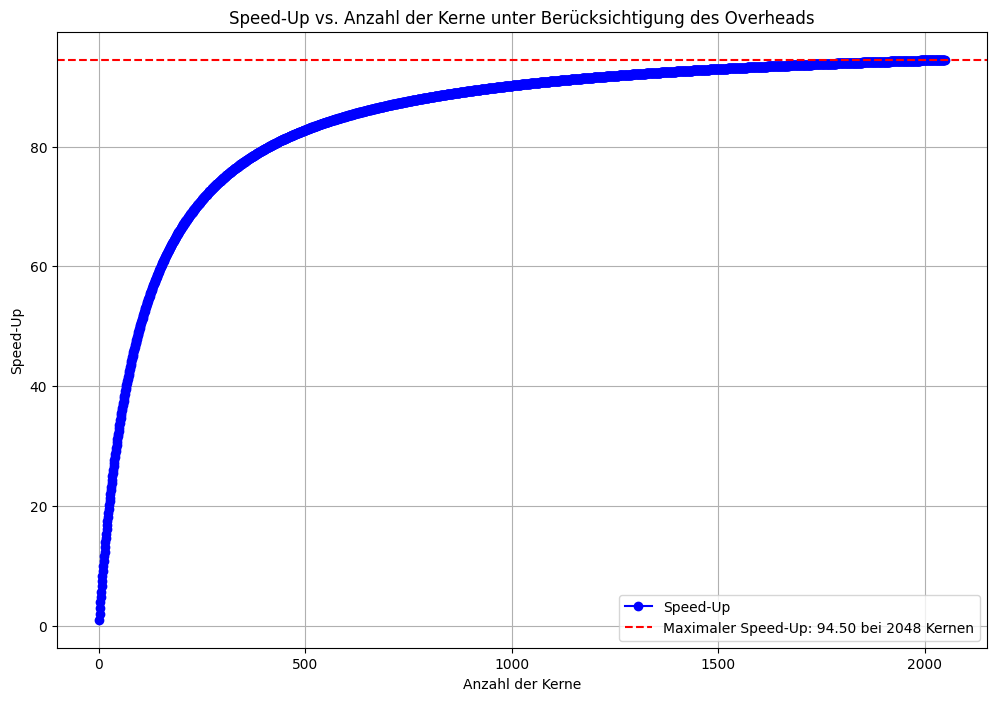

In [89]:
import pandas as pd
import matplotlib.pyplot as plt


def calculate_speed_ups(P, MAX_CORES):
    """Berechnet die Speed-Ups für eine Reihe von Kernanzahlen unter Berücksichtigung des parallelen Anteils und des Overheads."""
    N_values = range(1, MAX_CORES + 1)
    return [(1 / (0.01 + 0.0001 * P + P / N), N) for N in N_values]


def create_data_frame(two_powers, speed_ups):
    """Erstellt ein pandas DataFrame, das die Speed-Ups für ausgewählte Zweierpotenzen zeigt."""
    data = {'Kerne': two_powers, 'Speed-Up': [speed_ups[2 ** i - 1][0] for i in range(len(two_powers))]}
    return pd.DataFrame(data)


def plot_speed_ups(speed_ups, max_speed_up, optimal_cores):
    """Stellt die Speed-Ups gegenüber der Anzahl der Kerne dar, inklusive Linien, die den maximalen Speed-Up anzeigen."""
    speed_up_values, core_values = zip(*speed_ups)
    plt.figure(figsize=(12, 8))
    plt.plot(core_values, speed_up_values, marker='o', linestyle='-', color='b', label='Speed-Up')
    plt.axhline(y=max_speed_up, color='r', linestyle='--',
                label=f'Maximaler Speed-Up: {max_speed_up:.2f} bei {optimal_cores} Kernen')
    plt.title('Speed-Up vs. Anzahl der Kerne unter Berücksichtigung des Overheads')
    plt.xlabel('Anzahl der Kerne')
    plt.ylabel('Speed-Up')
    plt.legend()
    plt.grid(True)
    plt.show()


# Hauptausführung
if __name__ == '__main__':
    P = 0.99  # Parallelisierbarer Anteil
    MAX_CORES = 2048  # Maximale Anzahl der Kerne
    two_powers = [2 ** i for i in range(12)]  # Berechne Zweierpotenzen bis zum Maximum

    speed_ups = calculate_speed_ups(P, MAX_CORES)
    df = create_data_frame(two_powers, speed_ups)
    print(df)

    max_speed_up, optimal_cores = max(speed_ups)
    plot_speed_ups(speed_ups, max_speed_up, optimal_cores)


### 3. Problem
Write a simulation program that can be configured with (1) the fraction F of the serial part and (2) the number of processors P, and that simulates the execution time by spending a fixed time in the serial part and a time depending on P in the parallelizable part. Use the program to simulate a number of representative points on the graphs for speed-up according to Amdahl, as seen in the lecture.

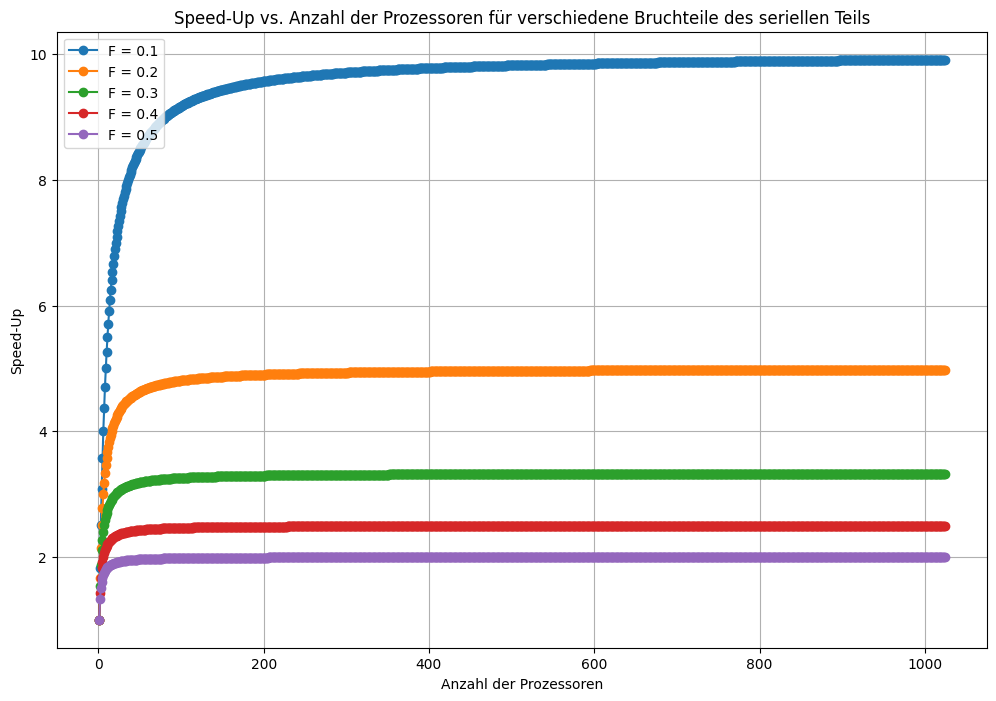

In [90]:
import matplotlib.pyplot as plt


def simulate_execution_time(f, p):
    """Simuliert die Ausführungszeit für einen gegebenen Bruchteil seriellen Codes (f) und Anzahl von Prozessoren (p)."""
    serial_time = f
    parallel_time = (1 - f) / p
    total_time = serial_time + parallel_time
    return total_time


def simulate_speedups(f_values, max_p):
    """Berechnet die Speed-Ups für verschiedene Bruchteile des seriellen Codes und Anzahlen von Prozessoren."""
    results = {}
    for f in f_values:
        p_values = list(range(1, max_p + 1))
        execution_times = [simulate_execution_time(f, p) for p in p_values]
        speed_ups = [1 / time for time in execution_times]
        results[f] = speed_ups
    return results, p_values


def plot_multiple_speedups(results, p_values):
    """Stellt mehrere Speed-Up-Kurven im selben Diagramm dar."""
    plt.figure(figsize=(12, 8))
    for f, speed_ups in results.items():
        plt.plot(p_values, speed_ups, marker='o', linestyle='-', label=f'F = {f}')
    plt.title('Speed-Up vs. Anzahl der Prozessoren für verschiedene Bruchteile des seriellen Teils')
    plt.xlabel('Anzahl der Prozessoren')
    plt.ylabel('Speed-Up')
    plt.legend()
    plt.grid(True)
    plt.show()


# Hauptausführung
if __name__ == '__main__':
    f_values = [0.1, 0.2, 0.3, 0.4, 0.5]  # Verschiedene Bruchteile des seriellen Codes
    max_p = 1024  # Maximale Anzahl der Prozessoren

    # Simulation durchführen
    results, p_values = simulate_speedups(f_values, max_p)

    # Ergebnisse darstellen
    plot_multiple_speedups(results, p_values)
